In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns


C:\Users\alexi\AppData\Local\Temp\ipykernel_11452\2471629622.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def convert_gross(x):
    if type(x) == str:
        return float(x[1:-1]) * 1000000
    else:
        return np.nan

In [4]:
# load dataset
df = pd.read_csv('Films_Animation.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        85 non-null     object 
 1   Rating       85 non-null     float64
 2   Votes        85 non-null     object 
 3   Gross        50 non-null     object 
 4   Genre        85 non-null     object 
 5   Metascore    80 non-null     float64
 6   Certificate  84 non-null     object 
 7   Director     85 non-null     object 
 8   Year         85 non-null     int64  
 9   Description  85 non-null     object 
 10  Runtime      85 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.4+ KB
None


Text(0, 0.5, 'Count')

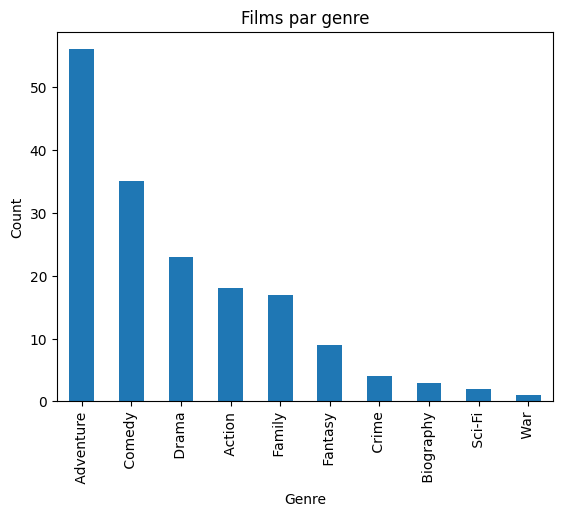

In [5]:
data = df.copy()
# get genre keywords foreach movie
data['Genre'] = data['Genre'].str.split(',')
data = data.explode('Genre')
# plot genre histogram
data['Genre'].value_counts().plot(kind='bar')
plt.title('Films par genre')
plt.xlabel('Genre')
plt.ylabel('Count')

Text(0.5, 1.0, 'Moyenne des notes par genre (Rating)')

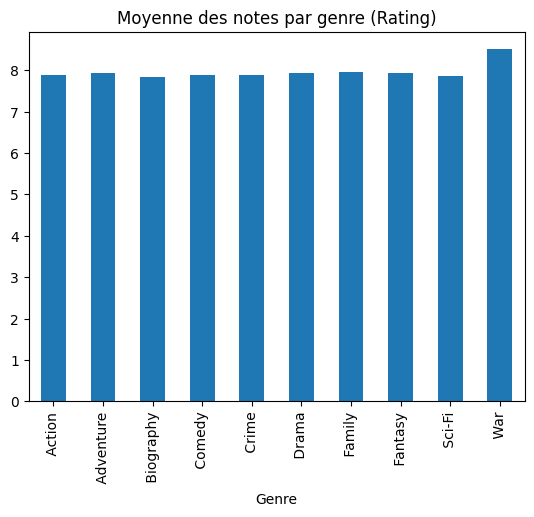

In [6]:
# (War a juste une occurence)
genre_avg = data.groupby('Genre')['Rating'].mean()
genre_avg.plot(kind='bar')
plt.title('Moyenne des notes par genre (Rating)')

Text(0.5, 1.0, 'Moyenne des notes par genre (Metascore)')

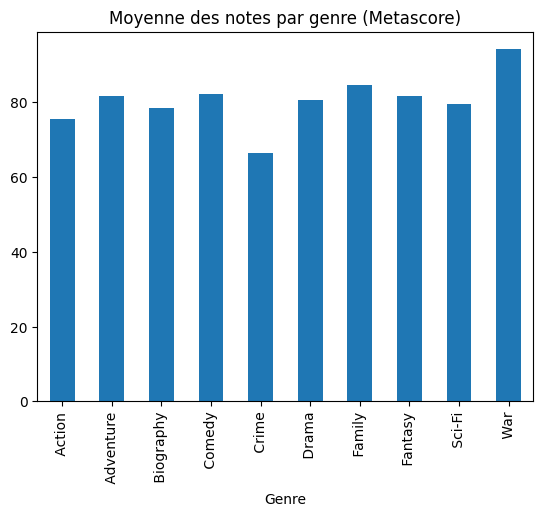

In [7]:
# calculate the average rating for each genre
genre_avg = data.groupby('Genre')['Metascore'].mean()
genre_avg.plot(kind='bar')
plt.title('Moyenne des notes par genre (Metascore)')

Text(0.5, 1.0, 'Moyenne des recettes par genre')

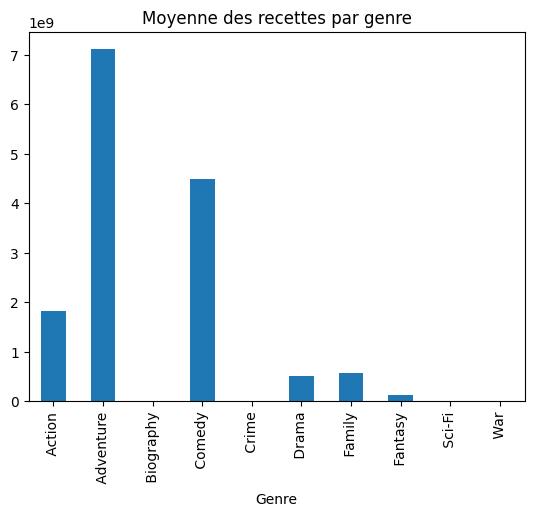

In [8]:
# Gross by genre
data['Gross'] = data['Gross'].apply(convert_gross)
genre_avg = data.groupby('Genre')['Gross'].sum()
genre_avg.plot(kind='bar')
plt.title('Moyenne des recettes par genre')

Année les plus prolifiques :
 Year
2001    6
2016    6
2014    5
1988    4
2009    4
Name: count, dtype: int64


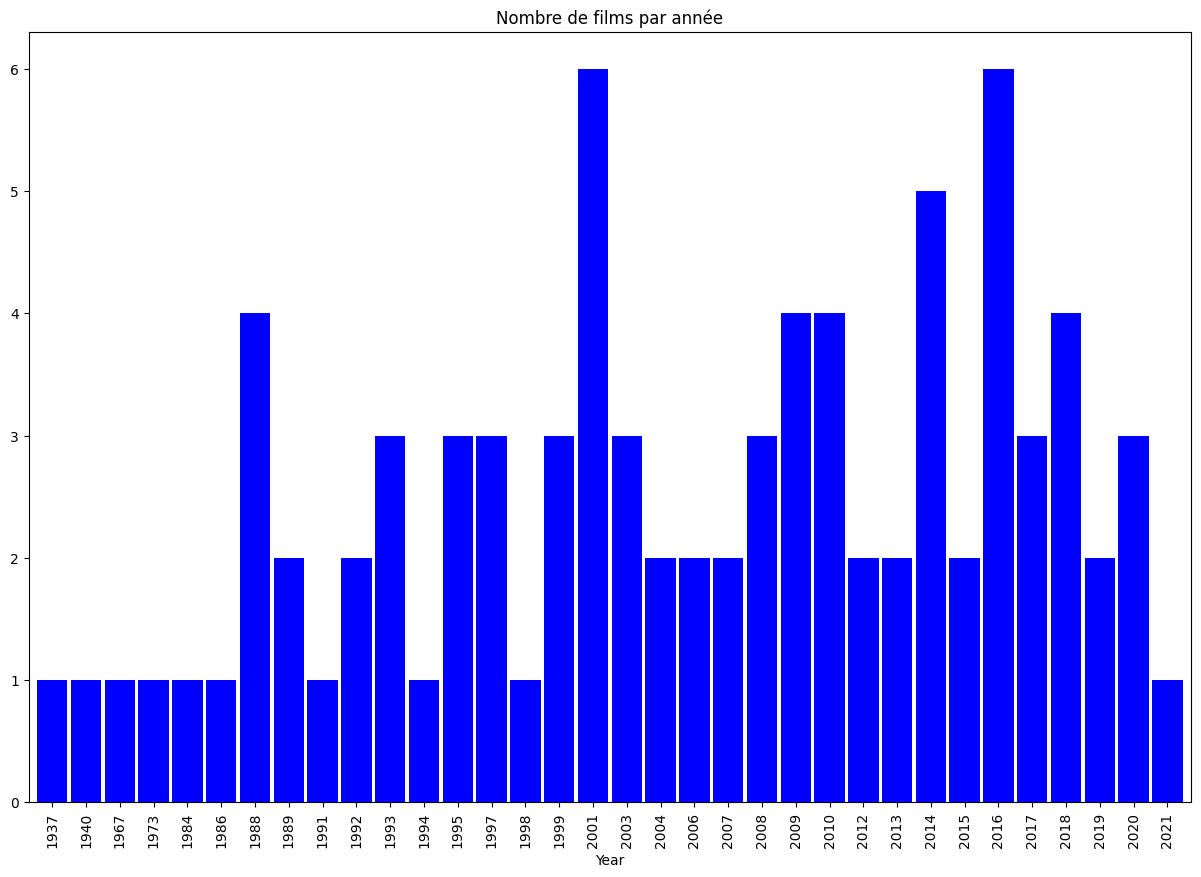

In [9]:
# get the number of films per year
data = df.copy()
films_per_year = data['Year'].value_counts().sort_index()
# plot
films_per_year.plot(kind='bar', color='blue', title='Nombre de films par année', figsize=(15, 10), width=0.9)
print("Année les plus prolifiques :\n", films_per_year.nlargest(5))

#

Directeurs les plus prolifiques :
 Director
Hayao Miyazaki    10
Pete Docter        4
Satoshi Kon        4
Brad Bird          4
Ron Clements       3
Name: count, dtype: int64


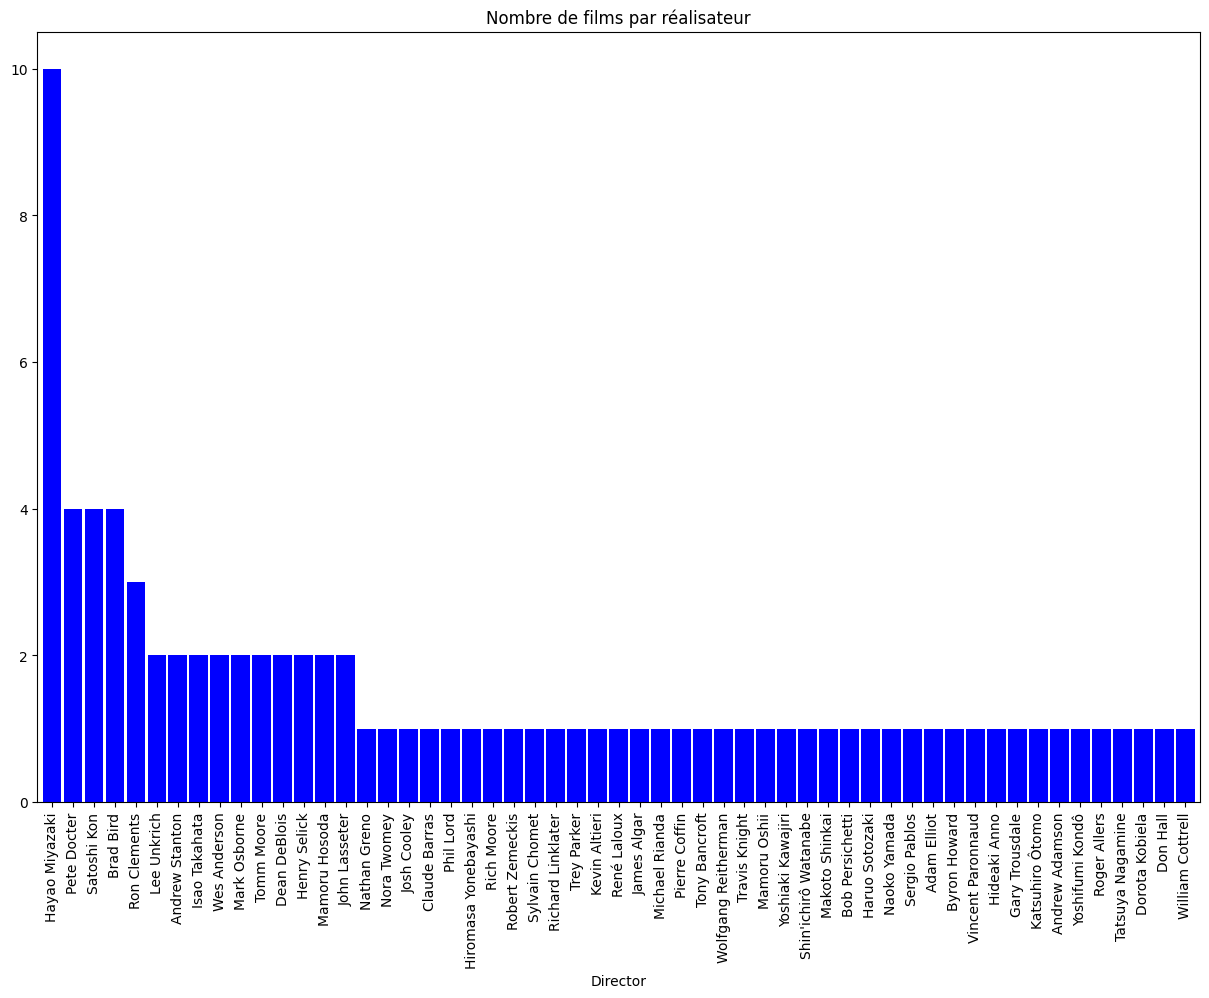

In [10]:
data = df.copy()

# number of films per director
films_per_director = data['Director'].value_counts()
# plot
films_per_director.plot(kind='bar', color='blue', title='Nombre de films par réalisateur', figsize=(15, 10), width=0.9)
print("Directeurs les plus prolifiques :\n", films_per_director.nlargest(5))

Moyenne de la durée des films : 99.3529411764706
Ecart-type de la durée des films : 14.637448615137284


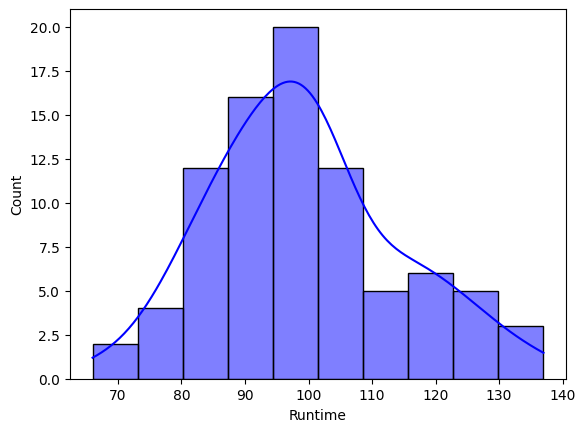

In [11]:
# Films par Runtime
data = df.copy()
# plot
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split()[0]))
# Loi de distribution avec seaborn
sns.histplot(data['Runtime'], kde=True, color='blue', bins=10)
# calcul de la moyenne
mean = data['Runtime'].mean()
print("Moyenne de la durée des films :", mean)
std = data['Runtime'].std()
print("Ecart-type de la durée des films :", std)

<Axes: xlabel='Runtime', ylabel='Rating'>

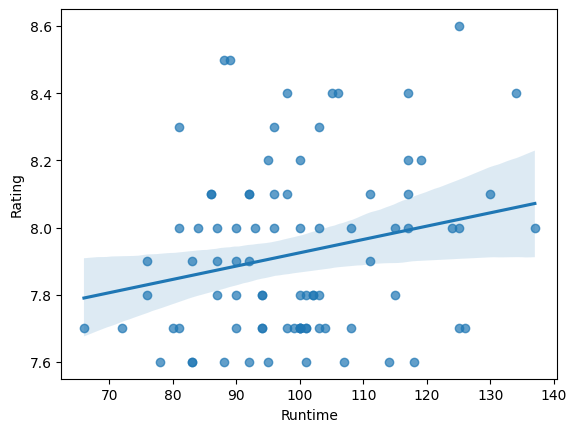

In [12]:
# Lien entre le Runtime et le Rating
data = df.copy()
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split()[0]))
sns.regplot(x='Runtime', y='Rating', data=data, scatter_kws={'alpha':0.7})

<Axes: xlabel='Runtime', ylabel='Metascore'>

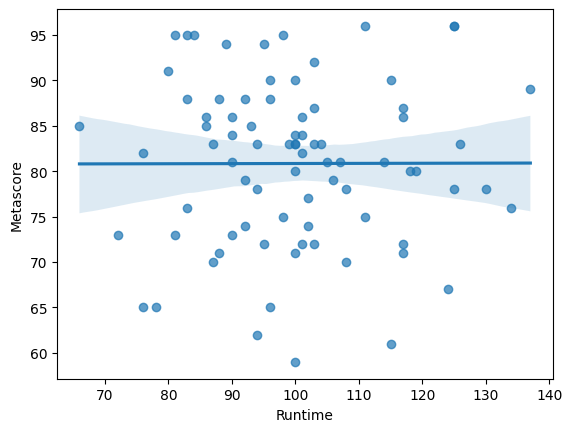

In [13]:
# Lien entre le Runtime et le Metascore
data = df.copy()
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split()[0]))
sns.regplot(x='Runtime', y='Metascore', data=data, scatter_kws={'alpha':0.7})

<Axes: xlabel='Rating', ylabel='Metascore'>

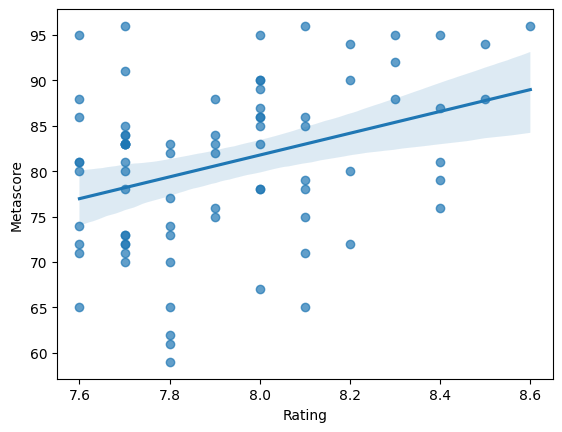

In [14]:
# Lien entre le Rating et le Metascore
data = df.copy()
sns.regplot(x='Rating', y='Metascore', data=data, scatter_kws={'alpha':0.7})

<Axes: xlabel='Rating', ylabel='Votes'>

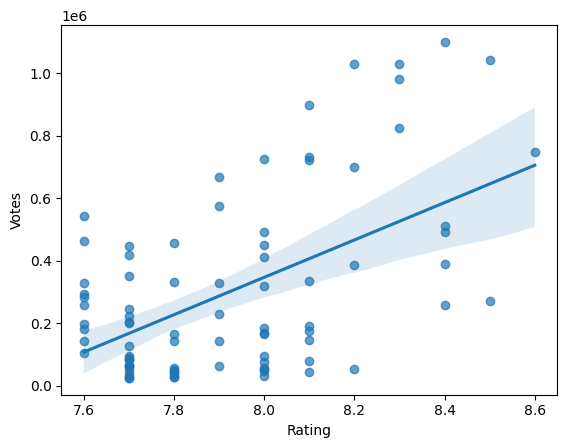

In [15]:
# Lien entre le Rating et le Votes
data = df.copy()
data['Votes'] = data['Votes'].apply(lambda x: int(x.replace(',', '')))
sns.regplot(x='Rating', y='Votes', data=data, scatter_kws={'alpha':0.7})

<Axes: xlabel='Metascore', ylabel='Votes'>

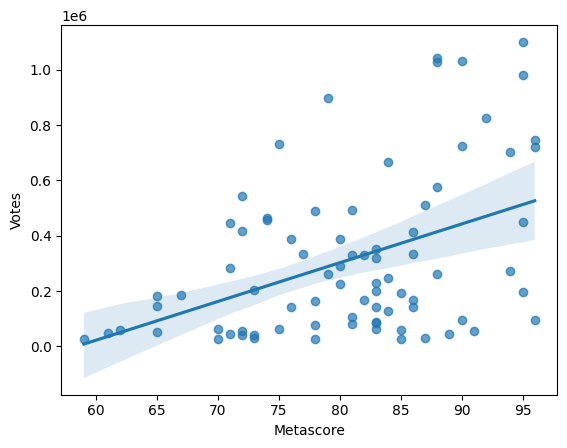

In [16]:
# Lien entre le Metascore et le Votes
data = df.copy()
data['Votes'] = data['Votes'].apply(lambda x: int(x.replace(',', '')))
sns.regplot(x='Metascore', y='Votes', data=data, scatter_kws={'alpha':0.7})

<Axes: xlabel='Runtime', ylabel='Votes'>

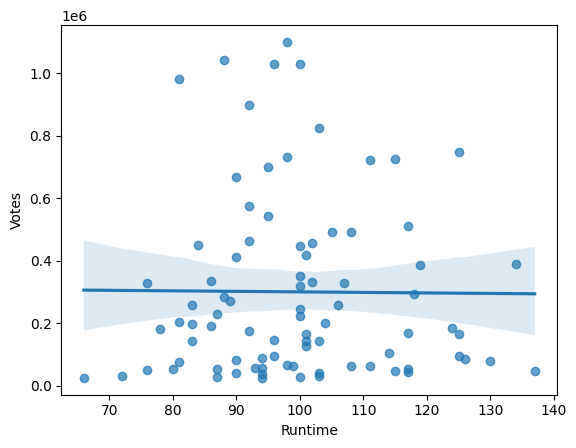

In [17]:
# Lien entre le Runtime et le Votes
data = df.copy()
data['Votes'] = data['Votes'].apply(lambda x: int(x.replace(',', '')))
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split()[0]))
sns.regplot(x='Runtime', y='Votes', data=data, scatter_kws={'alpha':0.7})

0     $10.06M
1    $422.78M
2         NaN
3      $5.02M
4    $190.24M
Name: Gross, dtype: object


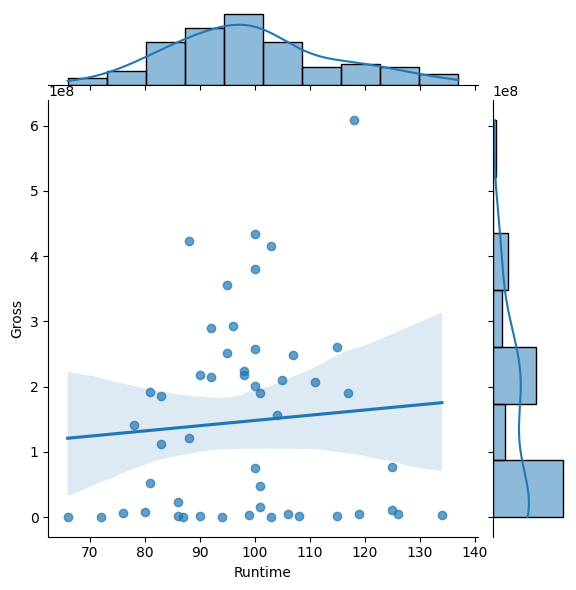

In [18]:
# Lien entre le Runtime et le Gross
data = df.copy()
print(data['Gross'].head())

data['Gross'] = data['Gross'].apply(convert_gross)
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split(' ')[0]))
# normal dirplot
sns.jointplot(x='Runtime', y='Gross', data=data, kind='reg', scatter_kws={'alpha':0.7})

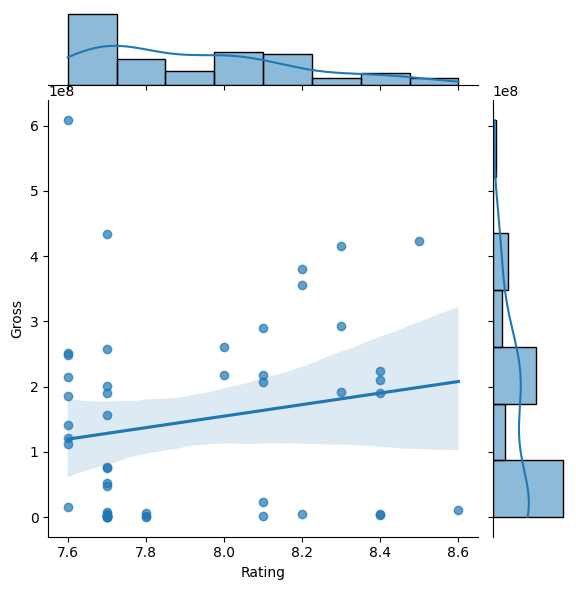

In [19]:
# Lien entre le Rating et le Gross
data = df.copy()
data['Gross'] = data['Gross'].apply(convert_gross)
data['Rating'] = data['Rating'].apply(lambda x: float(x))
sns.jointplot(x='Rating', y='Gross', data=data, kind='reg', scatter_kws={'alpha':0.7})


In [33]:
# regression linéaire multiple entre Gross, Rating, Metascore, Votes
data = df.copy()
data['Gross'] = data['Gross'].apply(convert_gross)
data['Rating'] = data['Rating'].apply(lambda x: float(x))
data['Votes'] = data['Votes'].apply(lambda x: int(x.replace(',', '')))
P = data[['Rating', 'Metascore', 'Votes', 'Gross']]
# remove NaN 
P = P.dropna()
X = P[['Rating', 'Metascore', 'Votes']]
Y = P['Gross']
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, Y)
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)
print("R2 :", model.score(X, Y))


Coefficients : [-2.58408215e+08  8.99656305e+05  4.54855497e+02]
Intercept : 1943279427.348103
R2 : 0.5402499535260956
